###Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_ex = pd.read_csv("/content/drive/MyDrive/existcapacity_annual.csv")
df_sep = pd.read_csv("/content/drive/MyDrive/State Energy Programs.csv")

###Exists Capacity - Didn't Work

In [ ]:
print(df_ex.head())


   Year State Code                              Producer Type  Fuel Source  \
0  1990         AK  Combined Heat and Power, Commercial Power  All Sources   
1  1990         AK  Combined Heat and Power, Commercial Power         Coal   
2  1990         AK  Combined Heat and Power, Commercial Power    Petroleum   
3  1990         AK  Combined Heat and Power, Industrial Power  All Sources   
4  1990         AK  Combined Heat and Power, Industrial Power  Natural Gas   

  Generators Facilities Nameplate Capacity (Megawatts)  \
0        NaN          4                           85.9   
1        NaN          3                           65.5   
2        NaN          1                           20.4   
3        NaN         23                          229.4   
4        NaN         28                          159.3   

  Summer Capacity (Megawatts)  
0                        80.1  
1                        61.1  
2                        19.0  
3                       204.2  
4                     

In [ ]:
print(df_ex.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54002 entries, 0 to 54001
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            54002 non-null  int64 
 1   State Code                      54002 non-null  object
 2   Producer Type                   54002 non-null  object
 3   Fuel Source                     53995 non-null  object
 4   Generators                      23610 non-null  object
 5   Facilities                      49581 non-null  object
 6   Nameplate Capacity (Megawatts)  54002 non-null  object
 7   Summer Capacity (Megawatts)     54002 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.3+ MB
None


In [ ]:
print(df_ex.describe())

               Year
count  54002.000000
mean    2007.711640
std        9.775565
min     1990.000000
25%     1999.000000
50%     2008.000000
75%     2016.000000
max     2023.000000


In [ ]:
# Check missing values
print(df_ex.isnull().sum().sort_values(ascending=False))

Generators                        30392
Facilities                         4421
Fuel Source                           7
Year                                  0
Producer Type                         0
State Code                            0
Nameplate Capacity (Megawatts)        0
Summer Capacity (Megawatts)           0
dtype: int64


In [ ]:
years =df_ex['Year'].unique()
#total_capacity = df_ex['Year'], df_ex['Nameplate Capacity (Megawatts)'].sum()
#grouped_by_state = filtered_df.groupby(['Energy_Type', 'State'])[year_cols].sum()
total_capacity = df_ex.groupby(['Year'])['Nameplate Capacity (Megawatts)'].sum()
print(years, total_capacity)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023] Year
1990    85.965.520.4229.4159.368.31.81,754.753.5240.79...
1991    72.560.51.910.1219.8144.337.638.01,754.753.524...
1992    72.560.51.910.1238.6159.839.039.81,873.053.535...
1993    68.060.57.5239.7159.858.121.81,916.053.5358.39...
1994    76.360.515.8237.9159.840.138.01,939.153.5358.3...
1995    76.260.515.7230.9160.232.738.01,929.553.5359.0...
1996    76.360.515.8230.9160.232.738.01,932.553.5359.4...
1997    76.360.515.8232.1161.470.71,948.953.5368.8911....
1998    43.835.58.356.554.02.5231.8160.671.21,925.325....
1999    53.435.517.962.554.08.5193.8160.633.21,948.525...
2000    53.036.018.063.054.09.0236.0203.034.01,976.025...
2001    53.036.018.063.054.09.0225.0192.034.01,938.025...
2002    53.036.018.063.054.09.0190.0156.034.01,938.028...
2003    84.061.024.029.029.068.036.032.01,945.028.0400...
2004    8

TypeError: no numeric data to plot

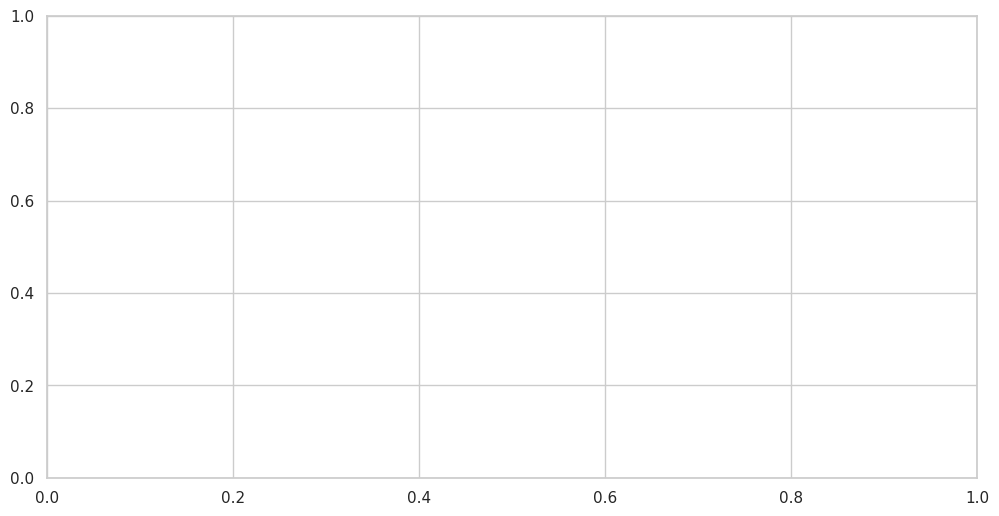

In [ ]:
# Total energy use over time
#year_cols = [col for col in df.columns if col.isdigit()]
#total_by_year = df[year_cols].sum()

plt.figure(figsize=(12, 6))
total_capacity.plot(x='Years', y="Nameplate Capacity (Megawatts)", title="Total U.S. Energy Capacity by Year", xlabel="Year", ylabel="Nameplate Capacity (Megawatts)")
plt.grid(True)
plt.show()

###State Energy Policies

In [ ]:
print(df_sep.head())


                                                Name State  \
0                             Alaska Solar Easements    AK   
1                            Power Project Loan Fund    AK   
2  Golden Valley Electric Association - Sustainab...    AK   
3  Energy Efficiency Interest Rate Reduction Program    AK   
4                           Association Loan Program    AK   

              Category        Policy_Incentive_Type     Created Last_Updated  
0    Regulatory Policy     Solar/Wind Access Policy    1/1/2000    11/5/2023  
1  Financial Incentive                 Loan Program    1/1/2000    10/9/2024  
2  Financial Incentive  Performance-Based Incentive  12/13/2005    3/21/2025  
3  Financial Incentive                 Loan Program   5/18/2006    10/4/2024  
4  Financial Incentive                 Loan Program   5/18/2006    10/4/2024  


In [ ]:
print(df_sep.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   2529 non-null   object
 1   State                  2529 non-null   object
 2   Category               2529 non-null   object
 3   Policy_Incentive_Type  2529 non-null   object
 4   Created                2529 non-null   object
 5   Last_Updated           2529 non-null   object
dtypes: object(6)
memory usage: 118.7+ KB
None


In [ ]:
print(df_sep.describe())

                        Name State             Category Policy_Incentive_Type  \
count                   2529  2529                 2529                  2529   
unique                  2249    57                    2                    45   
top     Building Energy Code    CA  Financial Incentive        Rebate Program   
freq                      46   156                 1841                  1138   

         Created Last_Updated  
count       2529         2529  
unique      1220          492  
top     1/1/2000    8/11/2023  
freq         166           56  


In [ ]:
print(min(df_sep['Created']),max(df_sep['Created']))
print(min(df_sep['Last_Updated']),max(df_sep['Last_Updated']))

1/1/2000 9/9/2010
1/1/2025 9/8/2023


In [ ]:
# Check missing values
print(df_sep.isnull().sum().sort_values(ascending=False))

Name                     0
State                    0
Category                 0
Policy_Incentive_Type    0
Created                  0
Last_Updated             0
dtype: int64


In [ ]:
df_sep_summary1 = df_sep.groupby(['Category'], sort=True)['Name'].count()
df_sep_summary1

,Name
Category,
Financial Incentive,1841
Regulatory Policy,688


In [ ]:
df_sep['Created_Year'] = [date[-4:] for date in df_sep['Created']]

In [ ]:
df_sep_by_year = df_sep.groupby(['Created_Year'])['Name'].count()

In [ ]:
df_sep_by_year.head()

,Name
Created_Year,
2000,167
2001,46
2002,32
2003,38
2004,29


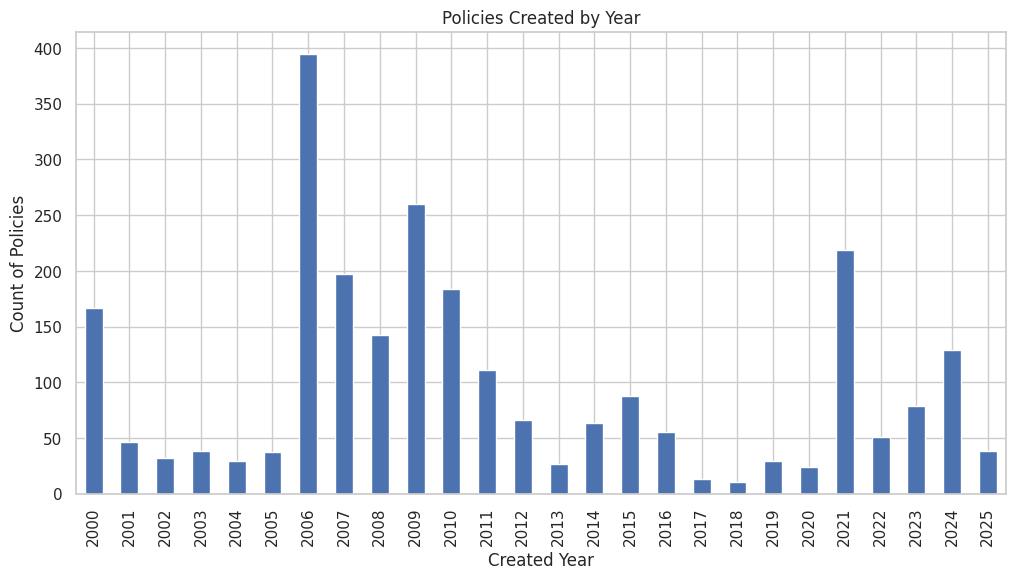

In [ ]:
plt.figure(figsize=(12, 6))
df_sep_by_year.plot(x='Created_Year', y='Name', kind = 'bar',  stacked = True, title="Policies Created by Year", xlabel="Created Year", ylabel="Count of Policies")
plt.grid(True)
plt.show()

In [ ]:
df_sep_summary = df_sep.groupby(['Category', 'Policy_Incentive_Type'], sort=True)['Name'].count()
df_sep_summary

Category             Policy_Incentive_Type                   
Financial Incentive  Bond Program                                   6
                     Corporate Depreciation                         1
                     Corporate Tax Credit                          19
                     Corporate Tax Deduction                        4
                     Corporate Tax Exemption                        6
                     Feed-in Tariff                                 7
                     Grant Program                                171
                     Green Building Incentive                      18
                     Industry Recruitment/Support                  26
                     Leasing Program                                3
                     Loan Program                                 169
                     Other Incentive                                7
                     PACE Financing                                52
                     Performance-Based Incentive                   25
                     Personal Tax Credit                           25
                     Personal Tax Deduction                         5
                     Personal Tax Exemption                         4
                     Property Tax Assessment                        1
                     Property Tax Incentive                        88
                     Rebate Program                              1138
                     Sales Tax Incentive                           54
                     Solar Renewable Energy Credit Program          9
                     Utility Rate Discount                          3
Regulatory Policy    Appliance/Equipment Efficiency Standards      17
                     Building Energy Code                          82
                     Community Solar Rules                         25
                     Energy Efficiency Resource Standard           30
                     Energy Standards for Public Buildings         96
                     Energy Storage Target                         12
                     Equipment Certification                        4
                     Generation Disclosure                         25
                     Green Power Purchasing                        21
                     Interconnection                               52
                     Line Extension Analysis                        3
                     Mandatory Utility Green Power Option           8
                     Net Metering                                  72
                     Offshore Wind Energy Target                    9
                     Other Policy                                   1
                     Public Benefits Fund                          37
                     Renewables Portfolio Standard                 49
                     Solar Access Law/Guideline                     1
                     Solar/Wind Access Policy                      69
                     Solar/Wind Contractor Licensing               16
                     Solar/Wind Permitting Standards               57
                     Value of Solar Tariff                          2
Name: Name, dtype: int64